Versión modificada de un notebook original de [Nataly Ibarra](https://github.com/nataly-nicole)

In [1]:
%matplotlib inline

In [2]:
from matplotlib.pyplot import *
from numpy import *
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Geodésicas tipo tiempo en métrica de Schwarzchild:

# Potencial Efectivo

Definimos el potencial efectivo, ec. (3.111) del apunte, como

$$\bar{V}(r):=\left(1-\frac{2m}{r}\right)\left(1+\frac{h^2 m^2}{r^2} \right).$$

Es conveniente trabajar con la cantidad adimensional $x:=r/m$, entonces

$$\bar{V}(x):=\left(1-\frac{2}{x}\right)\left(1+\frac{h^2}{x^2} \right),$$

que graficamos a continuación para distintos valores de $h$.

In [3]:
def V(x):
    return (1.-2./x)*(1.+(h**2)/x**2)

In [4]:
x = linspace(2,100,1000)

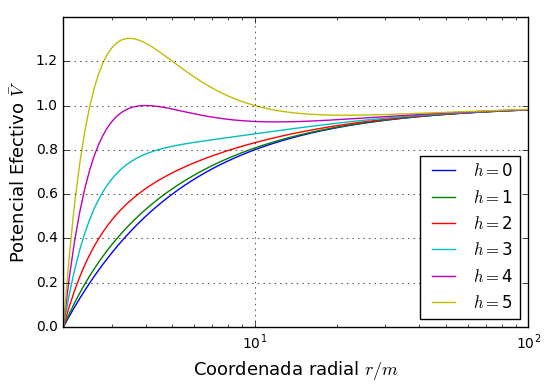

In [5]:
fig = figure(figsize=(6,4))
for h in range(0,6):
    plot(x,V(x), label='$h= $'+str(h))
    xscale("log")
    ylim(0,1.4)
    xlim(2,100)
    xlabel(r'Coordenada radial $r/m$', fontsize=13)
    ylabel(r'Potencial Efectivo $\bar{V}$', fontsize=13)
    legend(loc='best')
grid()

# Solución numérica

El parámetro de masa $m$ es definido por
$$ m= \frac{G M}{c^2}.$$

Con $G = 6.67259\times 10^{-11} [m^{3}kg^{−1}s^{−2}]$ y $c=2.99792458\times 10^{8} [ms^{-1}]$. 

Evaluamos $m$ para una masa solar (para el Sol $M = 1.989\times 10^{30} [Kg]$):

In [6]:
G = 6.67259e-11
c = 2.99792458e8
M = 1.989e30
m = G*M/(c**2)
print('m = '+str(m)+' [m]')

m = 1476.6848441 [m]


# Ecuación de la geodésica "completa"

Aquí resolveremos directamente la ecuación de la geodésica, sin realizar ninguna simplificación previa. Esto es, resolveremos las ecuaciones (3.99)-(3.102) del apunte:
\begin{align}
\ddot{t}+\frac{2m}{r(r-2m)}\,\dot{t}\,\dot{r} &= 0,\\
\ddot{r}+\frac{mc^2(r-2m)}{r^3}\,\dot{t}^2-\frac{m}{r\left(r-2m\right)}\,\dot{r}^2-(r-2m) \left[\dot{\theta}^2+\sin^2\theta\dot{\varphi}^2\right] &= 0,\\
\ddot{\theta}+\frac{2}{r}\dot{r}\dot{\theta}-\sin\theta\cos\theta\dot{\varphi}^2 &= 0,\\
\ddot{\varphi}+\frac2{r}\dot{r}\dot{\varphi}+2\frac{\cos\theta}{\sin\theta}\dot{\theta}\dot{\varphi} &= 0,
\end{align}

Para esto introducimos las variables `td, rd, thd, phd` que corresponden a las derivadas respecto al tiempo propio de las variables `t, r, th, ph`, que denotan los valores de las coordenadas $t,r,\theta,\varphi$. Con ésto, podemos ingresar el sistema de EDOs de primer  orden a ser resueltas usando `odeint`:

In [7]:
def dotx(x,tau):
    t,r,th,ph = x[0],x[1],x[2],x[3]
    td, rd, thd, phd = x[4],x[5],x[6],x[7]
    tdd = -((2*m)/(r*(r-2*m)))*td*rd
    rdd = (-(m*(c**2)*(r-2*m)/r**3)*(td**2)+(m/(r*(r-2*m)))*rd**2
           +(r-2*m)*(thd**2+(sin(th)**2)*phd**2))
    thdd = (-(2/r)*rd*thd+sin(th)*cos(th)*phd**2)
    phdd = (-(2/r)*rd*phd-2*(cos(th)/sin(th))*thd*phd)
    dotx = [td,rd,thd,phd,tdd,rdd,thdd,phdd]
    return dotx

Definiremos ahora una función que evalúa la solución del sistema, a partir de condiciones iniciales `x0` y un arreglo `tau` para los tiempos propios:

In [8]:
def sol(x0,tau):
    xsol = odeint(dotx,x0,tau)
    t = xsol[:,0]
    r = xsol[:,1]
    th = xsol[:,2]
    ph = xsol[:,3]
    td = xsol[:,4]
    rd = xsol[:,5]
    thd = xsol[:,6]
    phd = xsol[:,7]
    return t, r, th, ph, td, rd, thd, phd

Finalmente, definiremos algunas funciones que grafican las distintas variables:

In [9]:
def gt(tau,t):
    figure(figsize=(6,6))
    plot(tau,t)
    xlabel(r'$\tau$',fontsize=15)
    ylabel(r'$t(\tau)$',fontsize=15)
    grid()

In [10]:
def gr(tau,r):
    figure(figsize=(6,6))    
    plot(tau,r)
    xlabel(r'$\tau$',fontsize=15)
    ylabel(r'$r(\tau)$',fontsize=15)
    grid()

In [11]:
def gth(tau,th):
    figure(figsize=(6,6))    
    plot(tau,th)
    ylim(-4,4)
    xlabel(r'$\tau$',fontsize=15)
    ylabel(r'$\theta(\tau)$',fontsize=15)
    grid()

In [12]:
def gph(tau,ph):
    figure(figsize=(6,6))    
    plot(tau,ph)
    xlabel(r'$\tau$',fontsize=15)
    ylabel(r'$\varphi(\tau)$',fontsize=15)
    grid()

In [13]:
def gxyz(tau,th,ph):
    x = r*sin(th)*cos(ph)
    y = r*sin(th)*sin(ph)
    z = r*cos(th)
    fig = figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    ax.plot(x/m, y/m, z/m, label=r'$\vec{r}$')
    ax.set_zlim(-1,1)
    ax.legend()
    ax.set_xlabel(r'$x/m$',fontsize=15)
    ax.set_ylabel(r'$y/m$',fontsize=15)
    ax.set_zlabel(r'$z/m$',fontsize=15)
    grid()

In [14]:
def gxy(tau,th,ph):
    x = r*sin(th)*cos(ph)
    y = r*sin(th)*sin(ph)
    figure(figsize=(6,6))   
    plot(x/m, y/m)
    xlabel(r'$x/m$',fontsize=15)
    ylabel(r'$y/m$',fontsize=15)
    xlim(1.1*min(x/m),1.1*max(x/m))
    ylim(1.1*min(y/m),1.1*max(y/m))
    grid()

Además, podemos calcular y graficar las cantidades $k$ y $h$, definidas en (3.105), que deben ser conservadas sore la trayectoria:

In [15]:
def gk(tau,r,td):
    k = (1-2*m/r)*td
    figure(figsize=(6,6))
    plot(tau,k/k[0])
    xlabel(r'$\tau$',fontsize=15)
    ylabel(r'$k(\tau)/k(0)$',fontsize=15)
    ylim(0,2)
    grid()

In [16]:
def gh(tau,r,th,phd):
    h = (r**2*sin(th)*phd)/(m*c)
    figure(figsize=(6,6))
    plot(tau,h/h[0])
    xlabel(r'$\tau$',fontsize=15)
    ylabel(r'$h(\tau)/h(0)$',fontsize=15)
    ylim(0,2)
    grid()

# Ejemplo 1: ISCO

En este primer ejemplo, elegimos las condiciones iniciales de la trayectoria de modo que la órbita resultante sea la ISCO, determinada por las condiciones (3.120)-(3.122).

In [17]:
t0 = 0
r0 = 6*m
th0 = pi/2
ph0 = 0.
td0 = sqrt(2)
rd0 = 0
thd0 = 0
phd0 = (sqrt(3)/18.)*(c/m)
x0 = [t0,r0,th0,ph0,td0,rd0,thd0,phd0]
tau_max = 5*(2*pi)/phd0 # 5 periodos orbitales
tau = linspace(0,tau_max,10000)
t, r, th, ph, td, rd, thd, phd = sol(x0,tau)

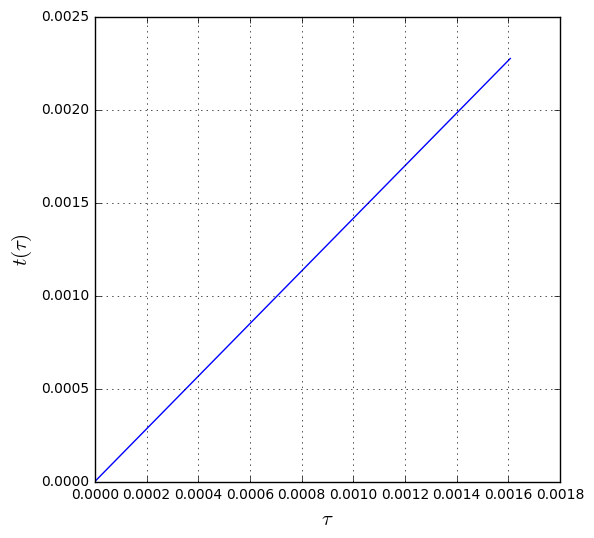

In [18]:
gt(tau,t)

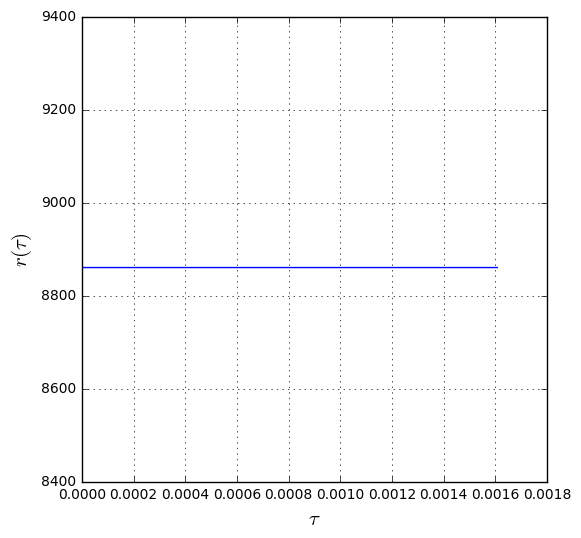

In [19]:
gr(tau,r)

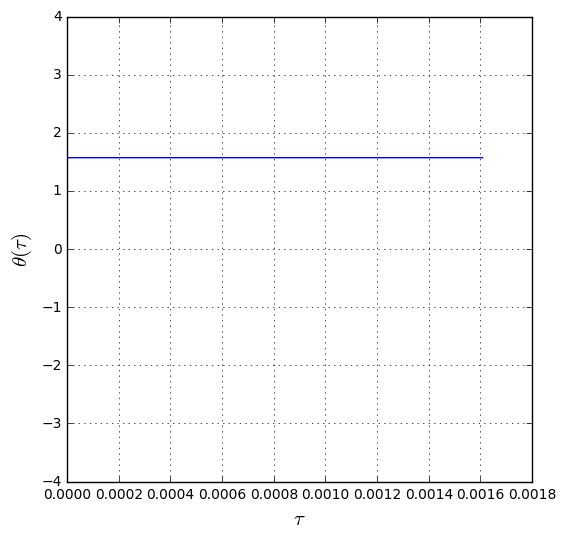

In [20]:
gth(tau,th)

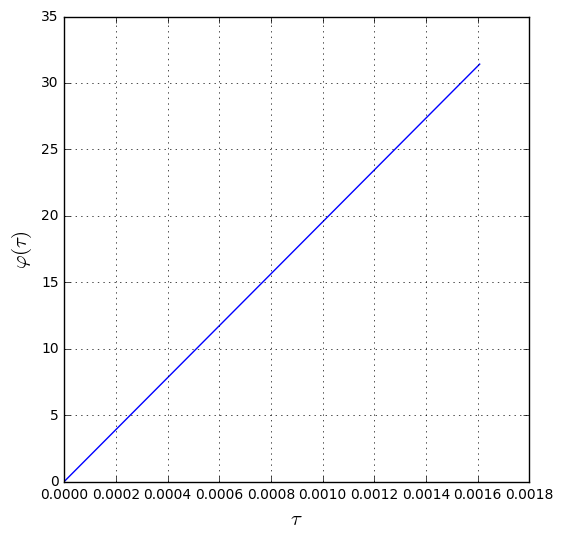

In [21]:
gph(tau,ph)

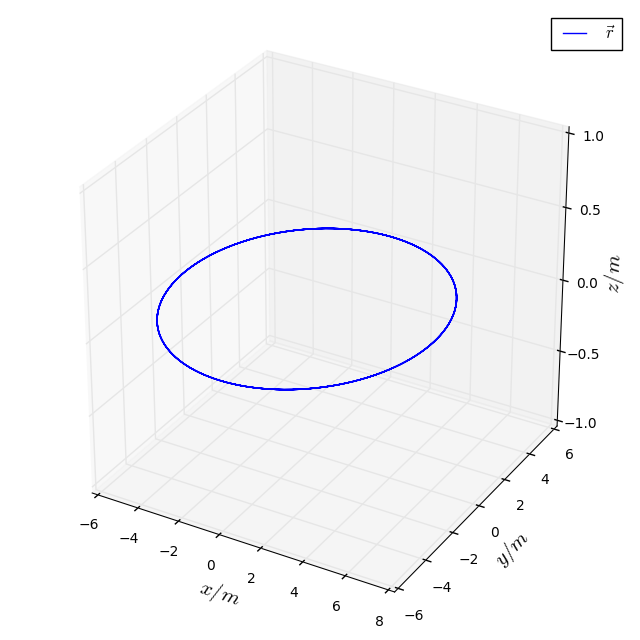

In [22]:
gxyz(tau,th,ph)

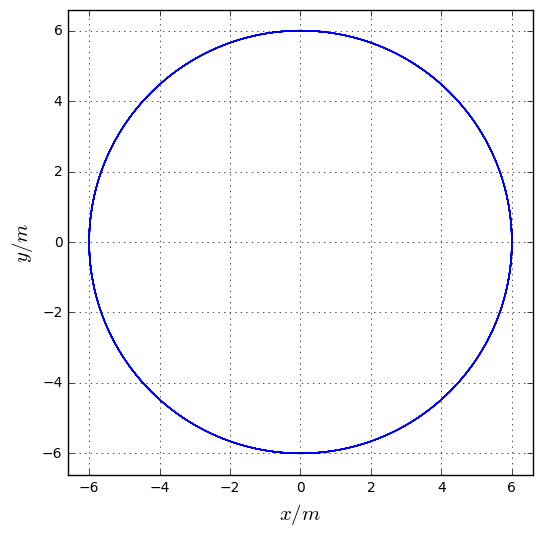

In [23]:
gxy(tau,th,ph)

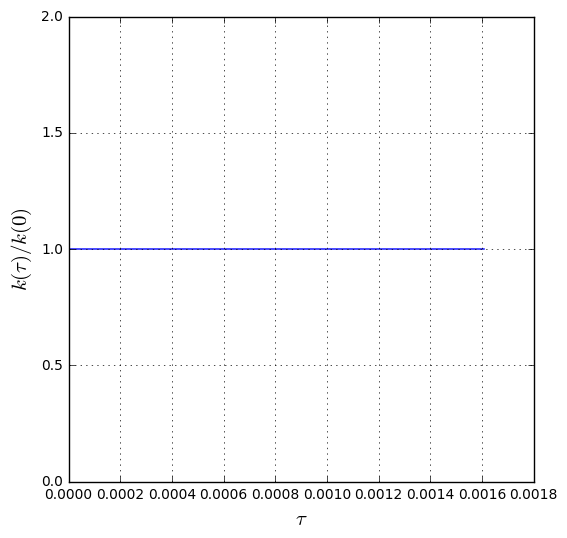

In [24]:
gk(tau,r,td)

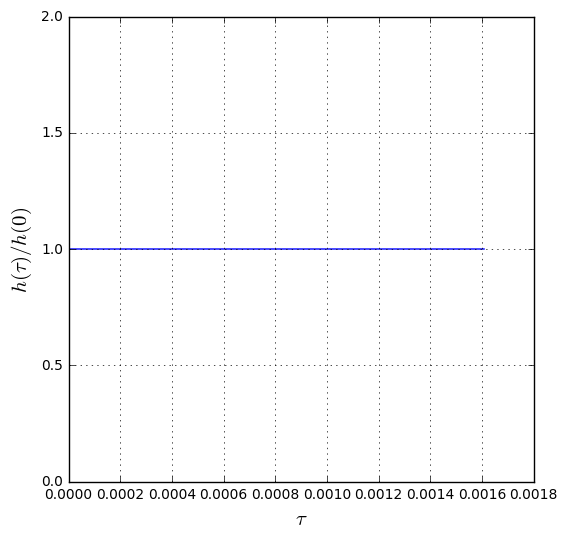

In [25]:
gh(tau,r,th,phd)

# Ejemplo 2: Órbita circular estable con $r=10m$

En este caso, las órbitas están determinadas por las constantes $h=h_c$ y $k=k_c$ dadas por las ecs. (3.117), además de (3.118) y (3.119) del apunte.

In [26]:
rc = 10*m
hc = rc/sqrt(m*(rc-3*m))
kc = (1-2.*m/rc)/sqrt(1-3.*m/rc)
t0 = 0
r0 = rc
th0 = pi/2
ph0 = 0
td0 = 1./sqrt(1-3*m/rc)
rd0 = 0
thd0 = 0
phd0 = (c/rc)*sqrt(m/(rc-3.*m))
x0 = [t0,r0,th0,ph0,td0,rd0,thd0,phd0]
tau_max = 5*(2*pi)/phd0 # 5 revoluciones
tau = np.linspace(0,tau_max,10000)
t, r, th, ph, td, rd, thd, phd = sol(x0,tau)

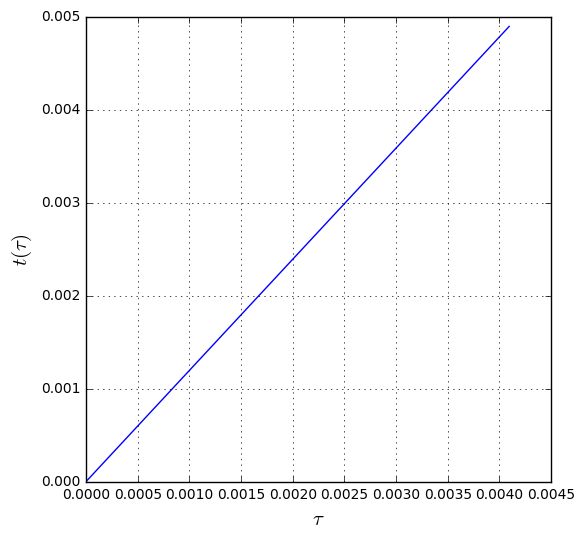

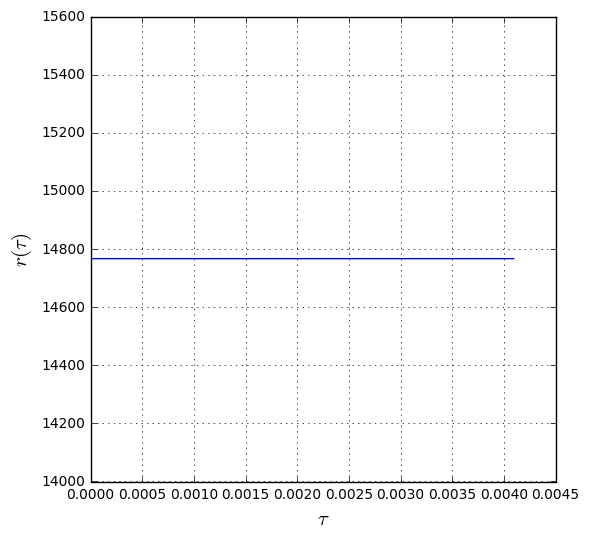

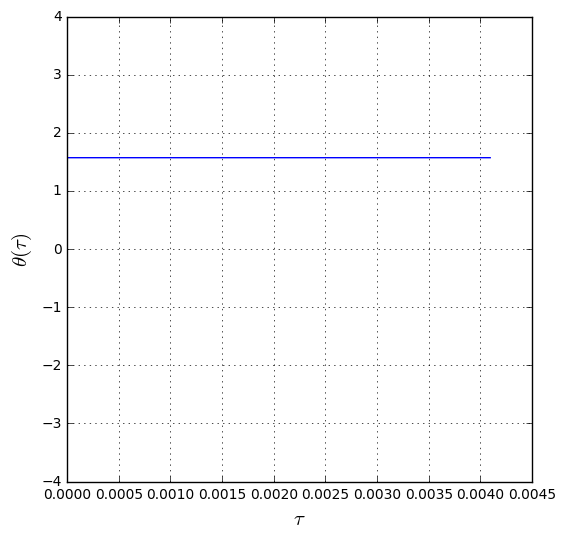

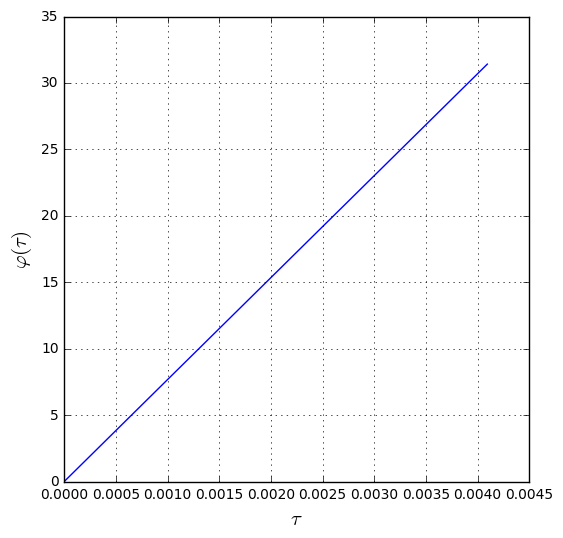

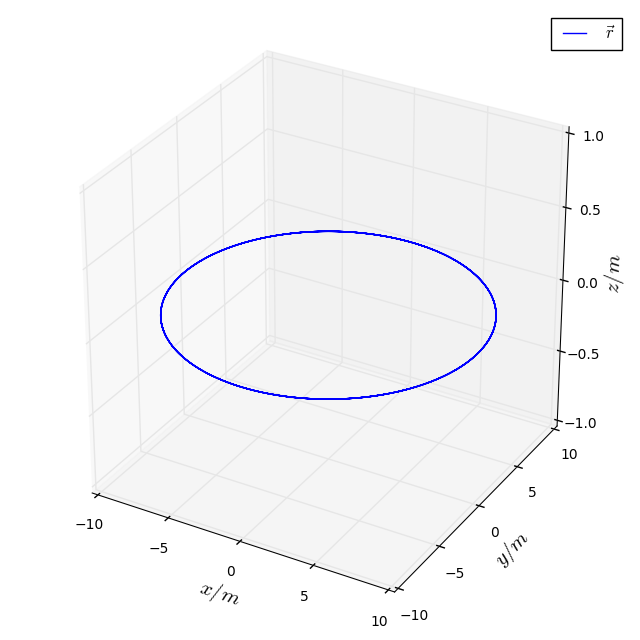

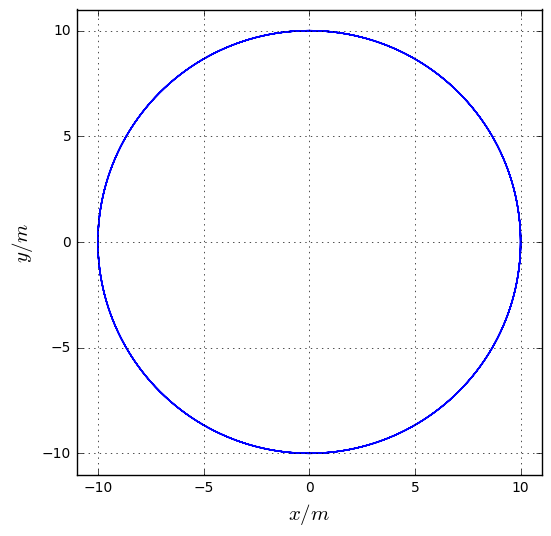

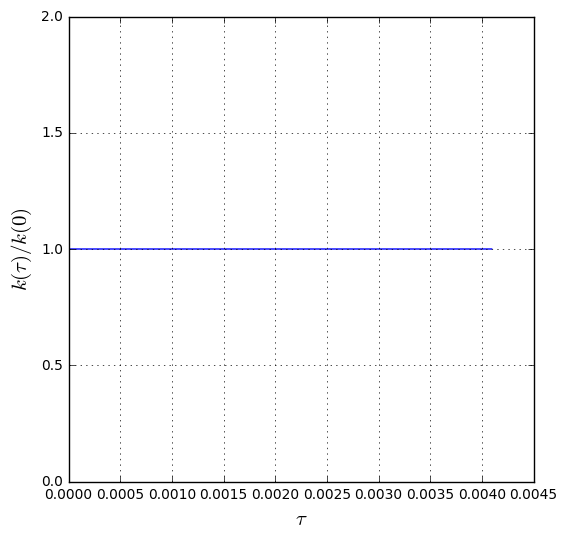

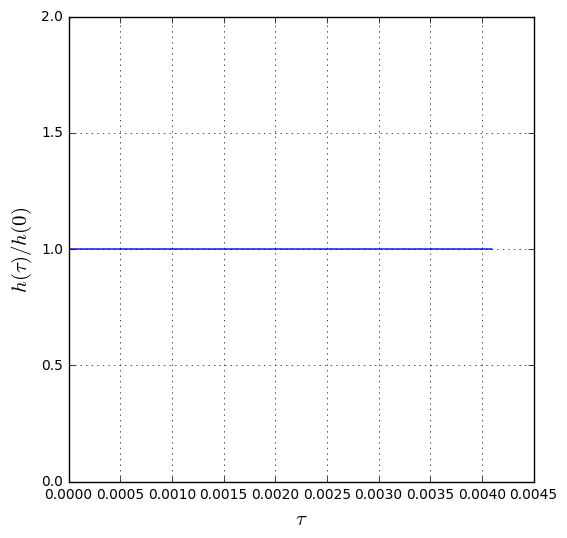

In [27]:
gt(tau,t)
gr(tau,r)
gth(tau,th)
gph(tau,ph)
gxyz(tau,th,ph)
gxy(tau,th,ph)
gk(tau,r,td)
gh(tau,r,th,phd)

# Ejemplo 3: Órbitas ligadas no circulares

Para mercurio $e = 0.2056$ y $a = 57.91\times 10^9 m$. Las 

$$ a= \frac{mh^2}{1-e^2}, \qquad k^2=\left(1-\frac{2m}{r_0}\right)\left(1+\frac{h^2m^2}{r_0^2}\right)$$

In [28]:
a = 57.91e9
e = 0.2056
t0 = 0
r0 = a*(1+e)
th0 = pi/2
ph0 = 0
h0 = sqrt(a*(1-e**2)/m)
k0 = sqrt((1-2*m/r0)*(1+h0**2*m**2/r0**2))
td0 = k0/(1-2*m/r0)
rd0 = 0
thd0 = 0
phd0 = h0*m*c/(r0**2*sin(th0))
x0 = [t0,r0,th0,ph0,td0,rd0,thd0,phd0]
tau_max = 5*(2*pi)/phd0 # 5 revoluciones
tau = linspace(0,tau_max,10000)
t, r, th, ph, td, rd, thd, phd = sol(x0,tau)

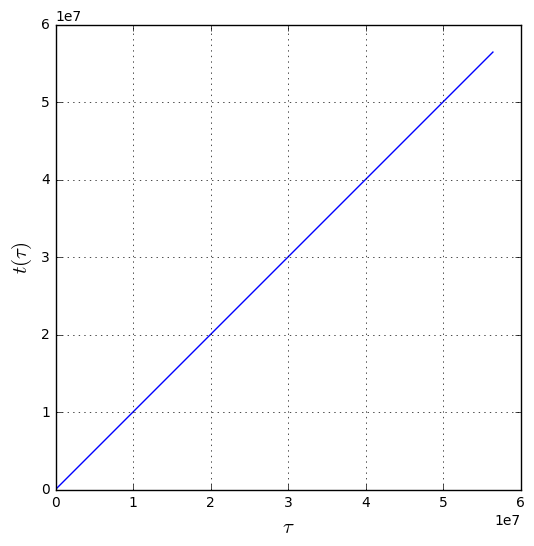

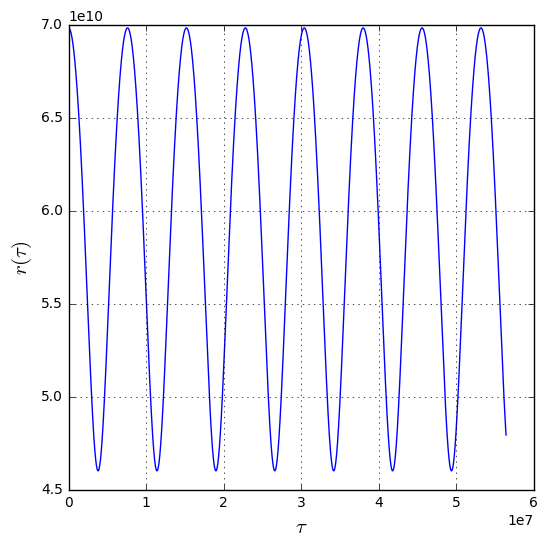

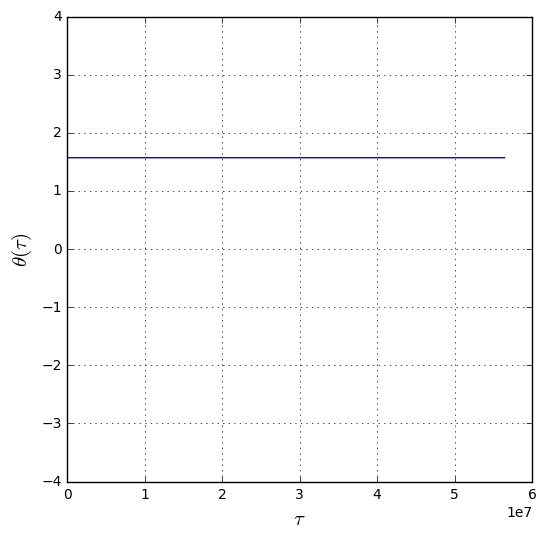

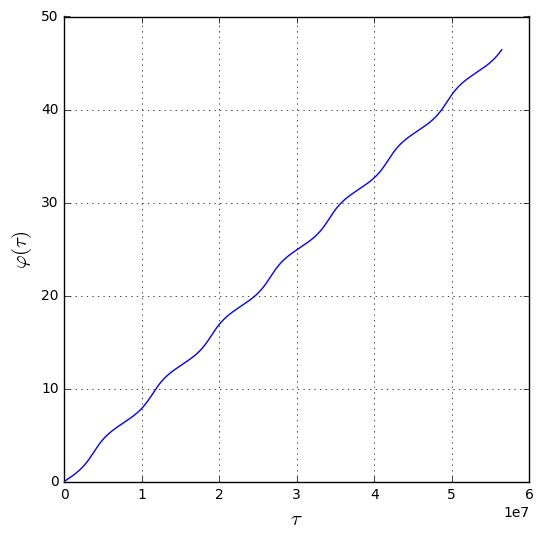

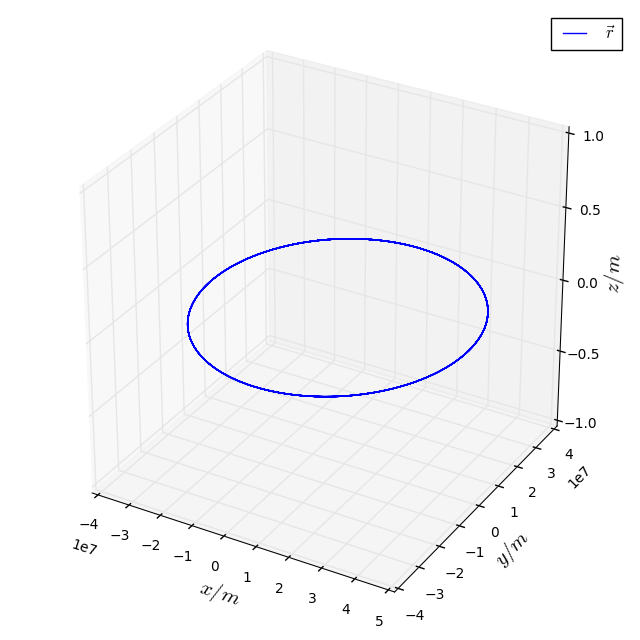

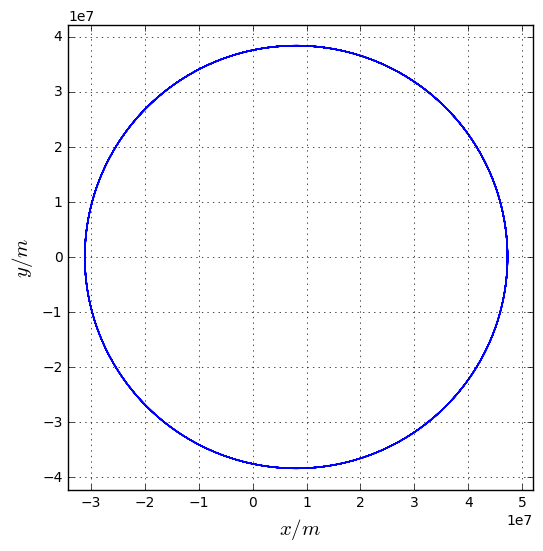

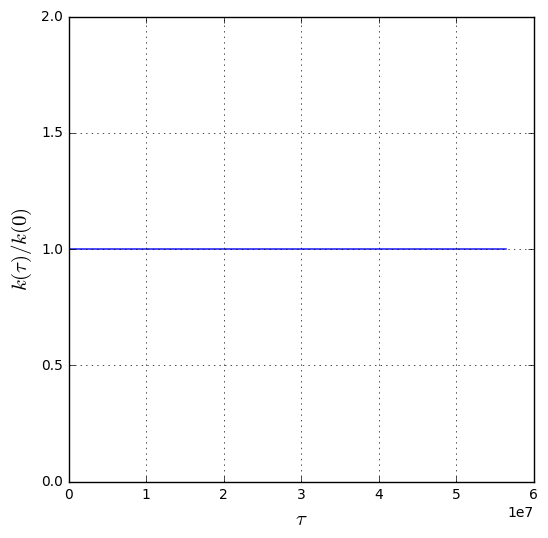

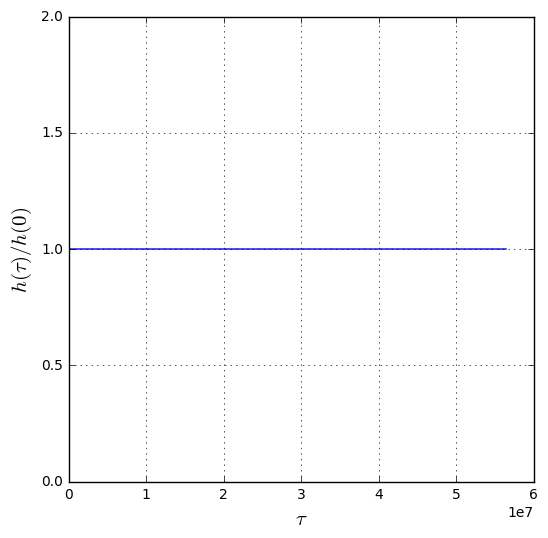

In [29]:
gt(tau,t)
gr(tau,r)
gth(tau,th)
gph(tau,ph)
gxyz(tau,th,ph)
gxy(tau,th,ph)
gk(tau,r,td)
gh(tau,r,th,phd)

# Solución exacta numérica

$w^{\prime \prime}+w = 1+\epsilon w^2.$

Con $\epsilon = 3/h^2$.

In [30]:
#para mercurio
#e = 0.2056
#a = 0.387098*1.4959787066e11 #metros
e = 0.9
a = 1000e3#metros
print('e = '+str(e))
print('a = '+str(a)+' [m]')

e = 0.9
a = 1000000.0 [m]


In [31]:
# ec. Kepler modificada en RG
# x[0]=w, x[1]=w'
def dotx(x,phi):#ec (3.132)
    return [x[1],1-x[0]+ep*x[0]**2]

In [32]:
r0 = a*(1.+e)
hmin = 2.*np.sqrt(3)
hmax = np.sqrt((2*r0/m)/(1-2*m/r0))
print('r0 = '+str(r0))
print('hmin = '+str(hmin))
print('hmax = '+str(hmax))

r0 = 1900000.0
hmin = 3.46410161514
hmax = 50.7674894131


In [33]:
h = np.sqrt((r0/m)*(1-e))
ep = 3./h**2
w0 = m*h**2/r0
wp0 = 0
#k=sqrt((1-2*w0/h**2)*(1+w0**2/h**2))

print('h = '+str(h))
print('epsilon = '+str(ep))
print('w0 = '+str(w0))

h = 11.3431295373
epsilon = 0.0233160764858
w0 = 0.1


In [34]:
x0 = [w0,wp0]
phi = np.linspace(0,2*(10*np.pi),100000)
wsol = odeint(dotx,x0,phi)
un = wsol[:,0]/(m*h**2)

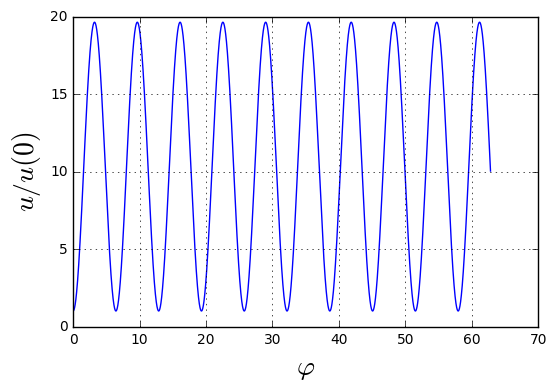

In [35]:
plot(phi,un/un[0])
xlabel(r'$\varphi$', fontsize=20)
ylabel(r'$u/u(0)$', fontsize=20)
#plt.ylim(0,max(un*r0)*1.2)
grid()

In [36]:
x = cos(phi)/un
y = sin(phi)/un

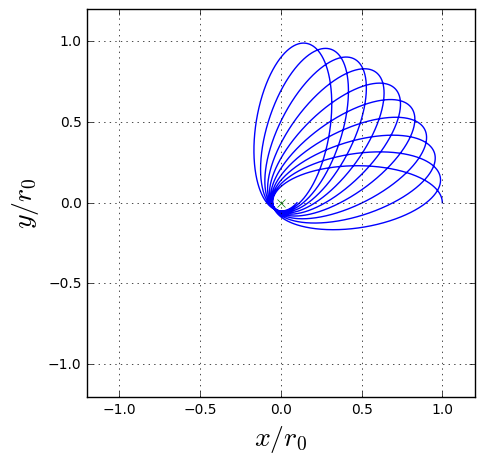

In [37]:
fig = figure(figsize=(5,5))
plot(x/r0,y/r0)
plot(0,0,'x')
xlim(-1.2,1.2)
ylim(-1.2,1.2)
xlabel('$x/r_0$',fontsize=20)
ylabel('$y/r_0$',fontsize=20)
grid()

# Solución analítica aproximada

$$u(\varphi)=\frac{1}{mh^2}\left[1+\epsilon\left(1+\frac{e^2}{2}\right)+e\cos[(1-\epsilon)\varphi]-\frac{e^2}{6}\epsilon \cos[2(1-\epsilon)\varphi] \right]$$

$$u(0)=\frac{1}{mh^2}\left[1+\epsilon\left(1+\frac{e^2}{2}\right)+e-\frac{e^2}{6}\epsilon \right]$$
$$u^{\prime}(0)=0.$$

In [38]:
#ec. (3.145) del apunte
def u(ph):
    return (1+ep*(1+e**2/2.)+e*cos((1-ep)*ph)
          -(e**2/6.)*ep*cos(2*(1-ep)*ph))/(m*h**2)#+O(ep^2)

In [39]:
ua = u(phi)

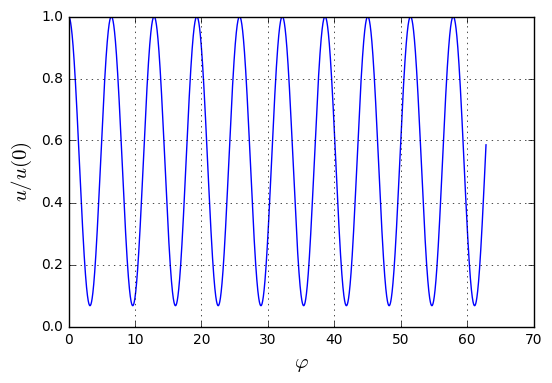

In [40]:
plot(phi,ua/ua[0])
xlabel(r'$\varphi$', fontsize=15)
ylabel(r'$u/u(0)$', fontsize=15)
#ylim(0,max(ua)*1.2)
grid()

In [41]:
x = cos(phi)/ua
y = sin(phi)/ua

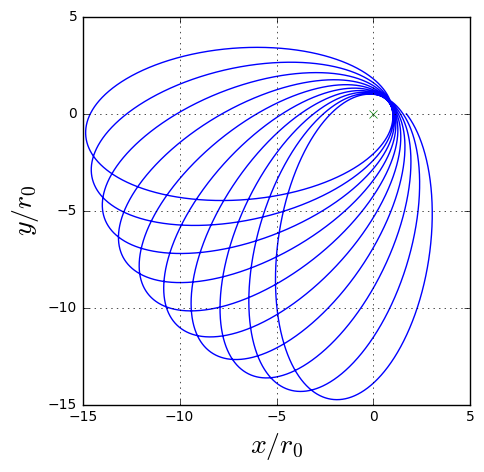

In [42]:
fig = figure(figsize=(5,5))
plot(x*ua[0],y*ua[0])
plot(0,0,'x')
#xlim(-1.2,1.2)
#ylim(-1.2,1.2)
xlabel('$x/r_0$',fontsize=20)
ylabel('$y/r_0$',fontsize=20)
grid()

In [43]:
#Se compara con solución numérica para las mismas condiciones iniciales
w0 = (1+ep*(1+e**2/2.)+e-ep*e**2/6.)
wp0 = 0.
x0 = [w0,wp0]
phi = linspace(0,2*(10*np.pi),100000)
wsol = odeint(dotx,x0,phi)
un = wsol[:,0]/(m*h**2)

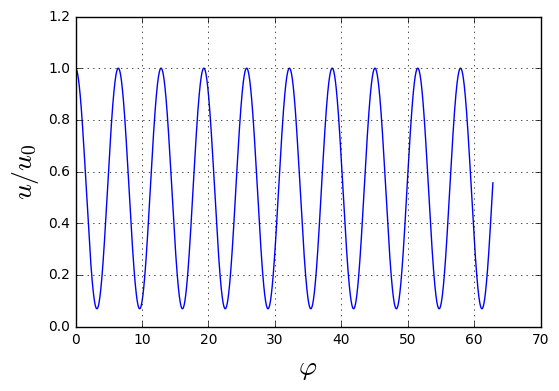

In [44]:
plot(phi,un/un[0])
xlabel(r'$\varphi$', fontsize=20)
ylabel(r'$u/ u_{0}$', fontsize=20)
#ylim(0,max(un*r0)*1.2)
grid()

In [45]:
x = cos(phi)/un
y = sin(phi)/un

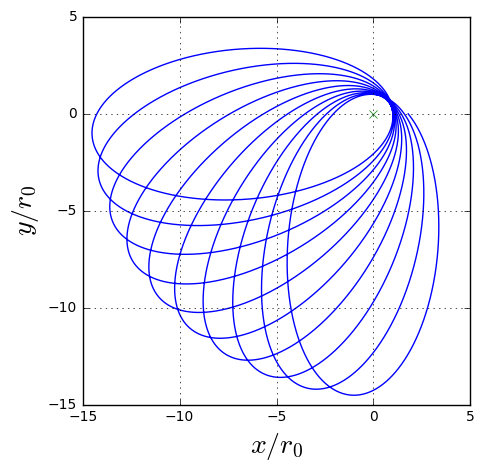

In [46]:
fig = figure(figsize=(5,5))
plot(x*un[0],y*un[0])
plot(0,0,'x')
#xlim(-1.2,1.2)
#ylim(-1.2,1.2)
xlabel('$x/r_0$',fontsize=20)
ylabel('$y/r_0$',fontsize=20)
grid()